In [2]:
import geopandas as gpd

In [3]:
import json

# Replace with the path to your JSON file
json_file = 'SIP_camden_adjbbox_normed.json'

# Open and load the JSON file
with open(json_file, 'r') as file:
    data = json.load(file)

data


[{'source': 'E01000139',
  'target': 'E01000139',
  'SIP_bi': 1.0,
  'SIP_pt': 1.0,
  'SIP_dr': 1.0},
 {'source': 'E01000139',
  'target': 'E01000141',
  'SIP_bi': 0.8508510333453544,
  'SIP_pt': 0.9584963927268855,
  'SIP_dr': 0.9377611682764961},
 {'source': 'E01000139',
  'target': 'E01000143',
  'SIP_bi': 0.8996006435480844,
  'SIP_pt': 0.9385033144317546,
  'SIP_dr': 0.8785155320954259},
 {'source': 'E01000139',
  'target': 'E01000490',
  'SIP_bi': 0.8905648877716549,
  'SIP_pt': 0.8439954210260097,
  'SIP_dr': 0.719989318255842},
 {'source': 'E01000139',
  'target': 'E01000491',
  'SIP_bi': 0.8305713729336309,
  'SIP_pt': 0.7909112690679658,
  'SIP_dr': 0.6837521393555266},
 {'source': 'E01000139',
  'target': 'E01000494',
  'SIP_bi': 0.8158489019361003,
  'SIP_pt': 0.7692410084391555,
  'SIP_dr': 0.7799771785714198},
 {'source': 'E01000139',
  'target': 'E01000495',
  'SIP_bi': 0.907134432262217,
  'SIP_pt': 0.8163618454330058,
  'SIP_dr': 0.738566766178044},
 {'source': 'E01000

In [5]:
import geopandas as gpd
import os
import glob
import pandas as pd
# Path where all shapefiles are located
shapefile_dir = "geo"  # Replace with your directory path
output_geojson = "aggregated.geojson"

# Collect all shapefile paths
shapefiles = glob.glob(os.path.join(shapefile_dir, "*.shp"))

# Read and concatenate all shapefiles into a single GeoDataFrame
gdfs = []
for shp in shapefiles:
    gdf = gpd.read_file(shp).to_crs("EPSG:4326")  # Convert CRS to WGS84
    gdfs.append(gdf)

# Combine into a single GeoDataFrame
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Save to GeoJSON
combined_gdf.to_file(output_geojson, driver='GeoJSON')

print(f"Saved aggregated GeoJSON to {output_geojson}")


Saved aggregated GeoJSON to aggregated.geojson


<Axes: >

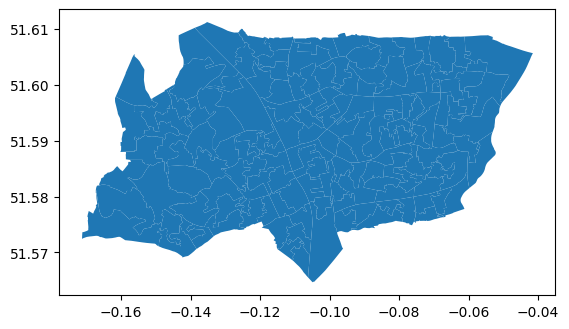

In [6]:
gdf.plot()

In [7]:
import geopandas as gpd

# Assuming you already have a GeoDataFrame (gdf)
# Replace with your desired output file path
geojson_path = 'camden.geojson'

# Save the GeoDataFrame as a GeoJSON file
gdf.to_file(geojson_path, driver='GeoJSON')

import geopandas as gpd
from shapely.geometry import Point


# Ensure the data is in the correct coordinate reference system (CRS)
gdf = gdf.to_crs("EPSG:4326")

# Calculate the centroids of the geometries in the GeoDataFrame
gdf['centroid'] = gdf.geometry.centroid

# Calculate the mean x and y coordinates of the centroids
mean_x = gdf['centroid'].x.mean()
mean_y = gdf['centroid'].y.mean()

# The mean centroid is the point with mean_x and mean_y
mean_centroid = Point(mean_x, mean_y)

# Create a GeoDataFrame to store the mean centroid
mean_centroid_gdf = gpd.GeoDataFrame(geometry=[mean_centroid], crs=gdf.crs)

# View the mean centroid
print("Mean Centroid:", mean_centroid_gdf)


Mean Centroid:                     geometry
0  POINT (-0.10258 51.58996)


/var/folders/2w/9xqgx8zx23x0sxltmvyhdk2h0000gn/T/ipykernel_12472/3685293755.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid


<Axes: >

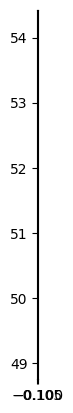

In [8]:
mean_centroid_gdf.plot()